<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/levelup.png' width=240/></center>

<center>모델을 빨리 만드는 것이 목적이 아닙니다. 천천히 생각하고 정리하면서 구문을 정성껏 작성하세요.</center>

# 과제: 의료비 예측


<img src = "https://github.com/Jangrae/img/blob/master/medical.png?raw=true" width=900 align="left"/>

# 실습 안내

**1) 실습 방법**

- 데이터 전처리와 탐색 보다는 모델 코딩에 중점을 둡니다.
- 기존 소스에서 복사해 붙여넣기 하지 않고 다시 코딩합니다.
- 실습 후 시간이 남으면 데이터 탐색과 성능 튜닝을 진행합니다. 
- 모든 작업에는 주석을 가능한 충분히 답니다.
- 입력을 요구한 **(작성)**, **(의견)** 부분을 충분히 채웁니다.

**2) 실습 내용**

- 대상 데이터를 읽어와 탐색하며 이해합니다.
- 결측치를 확인하고 처리합니다.
- 범주형 변수를 구분하고 가변수화를 진행합니다.
- 데이터를 학습용 데이터와 평가용 데이터로 분리합니다.
- 다양한 머신러닝 알고리즘을 사용해 모델링합니다.
- 성능 평가 결과를 이해하고 설명합니다.

**3) 데이터 정보**

- age: 나이
- sex: 성별(female, male)
- bmi: 체질량지수(체중을 키의 제곱으로 나눈 값, 적정수준:18.5 - 24.9)
- children: 자녀 수
- smoker: 흡연 여부
- region: 거주지역(northeast, southeast, southwest, northwest)
- charges: 건강보험에서 지불한 의료비 - Target

# 1.환경 준비

- 기본 라이브러리와 대상 데이터를 가져와 이후 과정을 준비합니다.

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format='retina'

In [137]:
# 데이터 읽어오기
# path = 'https://raw.githubusercontent.com/Jangrae/csv/master/insurance.csv'
path = 'https://bit.ly/InsuranceFile'
data = pd.read_csv(path)

# 2.데이터 탐색

- 다양한 탐색 및 분석 방법을 사용해 대상 데이터를 충분히 이해합니다.

**1) 상/하위 데이터 확인**

- 데이터 앞/뒤를 살펴 데이터를 간단히 확인합니다.

In [3]:
# 상위 몇 개 행 확인
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# 하위 몇 개 행 확인
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


**2) 변수 정보 확인**

- 변수 이름, 값 개수, 데이터 형식등을 확인합니다.

In [5]:
# 변수 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


**3) 기초통계정보 확인**

- 기초통계정보를 통해 숫자 데이터를 갖는 변수들 값 분포를 확인합니다.

In [6]:
# 기초통계정보 확인
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


**4) 결측치 확인**

- 결측치가 있는지 확인합니다.

In [7]:
# 결측치 확인
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

> 결측치 없음

**5) 상관관계 확인**

5-1) 변수들 간의 상관관계를 확인합니다.

In [138]:
# 상관분석
data.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


5-2) 상관관계를 시각화해 확인합니다.

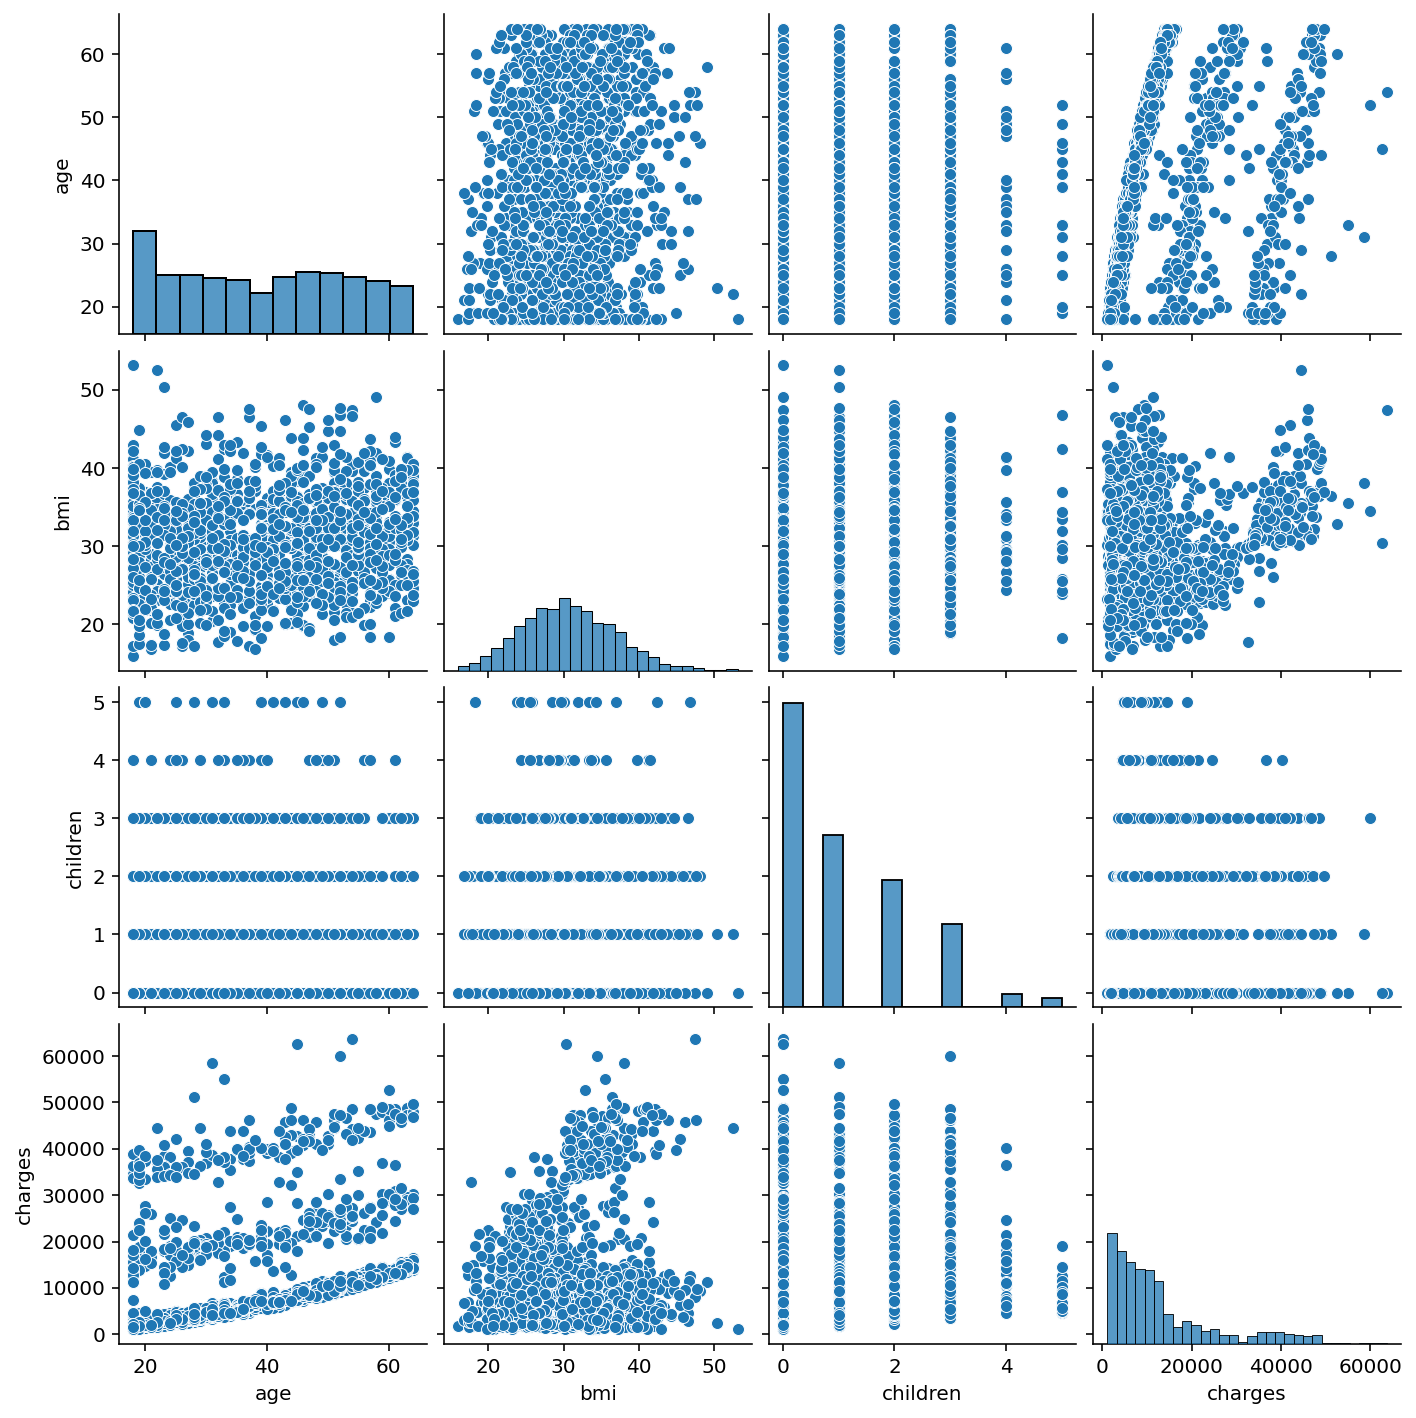

In [139]:
# 상관분석
sns.pairplot(data)
plt.show()

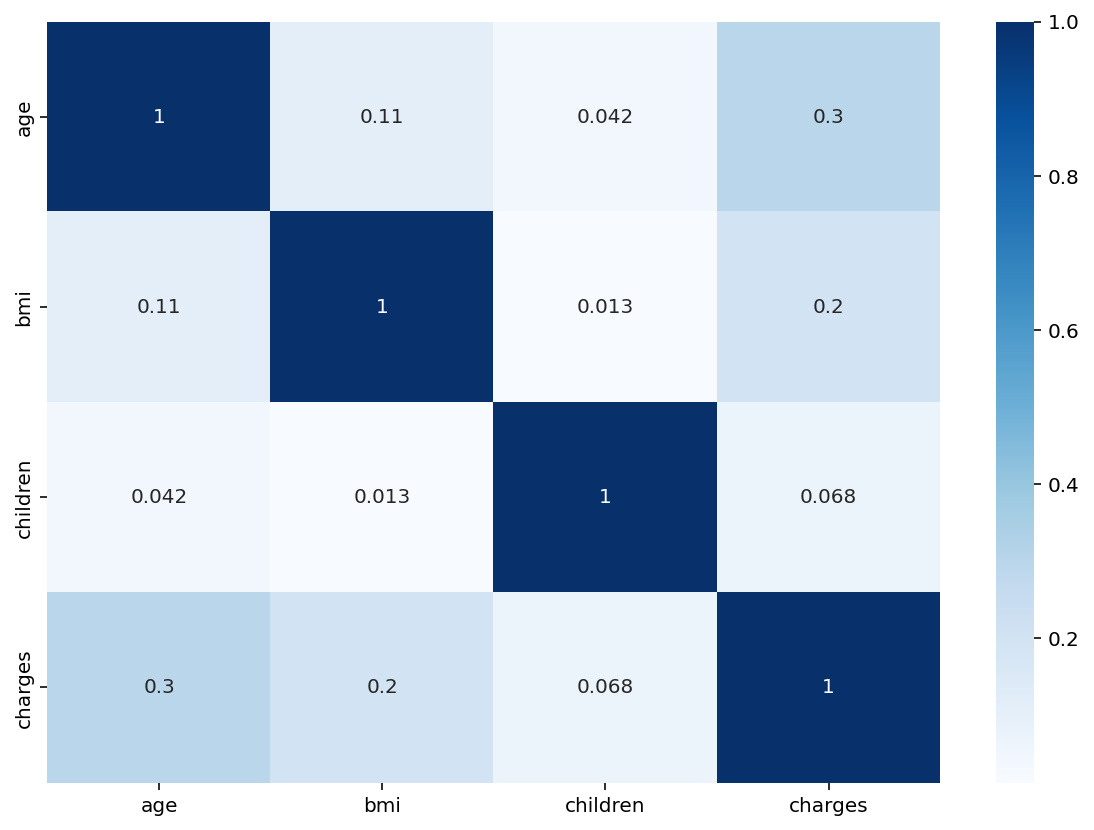

In [140]:
plt.figure(figsize=(10, 7))
sns.heatmap(data.corr(), annot=True, cmap='Blues')
plt.show()

- 상관계수로 봤을 때 charges와 다른 변수간의 강한 선형 관계를 나타내지 않는다.
- 상관계수 시각화 결과, charges와 age가 크게 3그룹으로 나뉘는 것을 볼 수 있다
- -> age도 charges에 영향을 주는 변수이지만, 다른 영향을 동시에 받아서 3그룹으로 나뉘어지는 것 같아보인다.
- 상관계수 시각화 결과, charges와 bmi 산점도에서 크게 2가지 그룹으로 나뉘는 것을 볼 수 있다.

**6) 범주값 변수 확인**

- 범주형 변수를 식별한 후 그 변수들이 어떤 범주값을 몇 개씩 갖는지 확인합니다.

In [141]:
# 범주값 개수 확인
print(data['sex'].value_counts())
print('='*70)
print(data['smoker'].value_counts())
print('='*70)
print(data['region'].value_counts())

male      676
female    662
Name: sex, dtype: int64
no     1064
yes     274
Name: smoker, dtype: int64
southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64


**7) 주요 변수 확인**

7-1) charges 변수 값 분포를 히스토그램으로 시각화해 확인합니다.

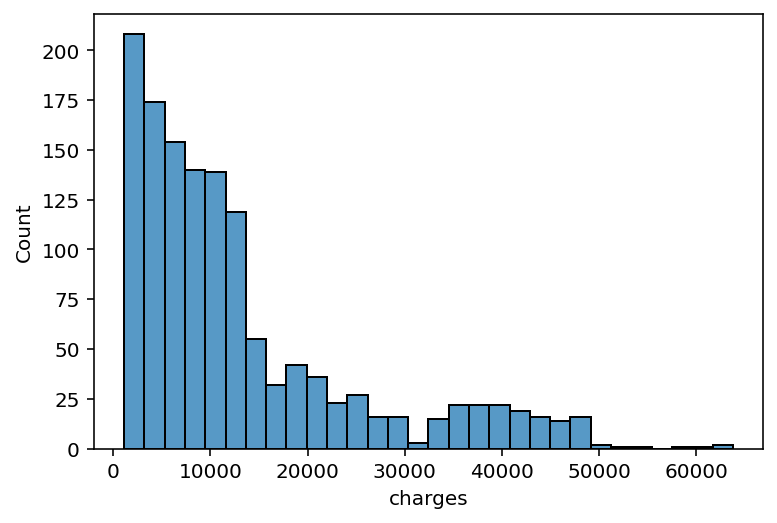

In [142]:
# median_house_value 값 분포
sns.histplot(x=data['charges'], data=data, bins = 30)
plt.show()

- charges는 오르쪽으로 꼬리가 긴 분포를 띄고 있다.
- 약 15000을 기준으로 charges가 급감하는 것을 볼 수 있다.
- --> 대부분의 사람이 의료비로  최대 15000을 지불하고, 소수의 사람들이 의료비를 많이 내는 구조로 파악이 된다.

7-2) age, charges 변수간 상관관계를 산점도(Scatter Plot)으로 시각화해 확인합니다.

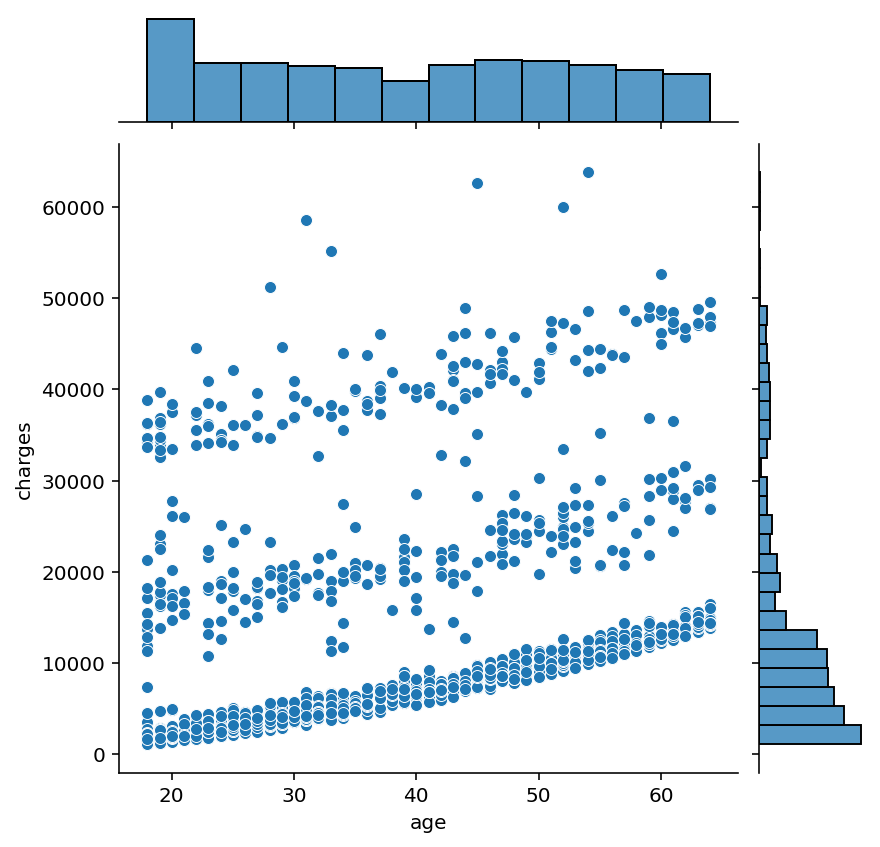

In [143]:
# age, charges 상관관계
sns.jointplot(x='age', y='charges', data=data)
plt.show()

- charges와 age는 크게 3그룹으로 나뉘는 것을 볼 수 있다
- -> age가 charges와 관련이 있지만, 다른 변수에 영향으로 나뉘었을 거라 추정한다.
- age가 높아질수록 charges도 증가하는 경향이 있다.

# 3.데이터 준비

- 전처리 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비합니다.

**1) 가변수화**

- sex, smoker, region 변수들에 대한 가변수화를 진행 합니다.

In [144]:
# 가변수화
data['sex'] = data['sex'].map({'male':1, 'female':0})
data['smoker'] = data['smoker'].map({'yes':1, 'no':0})
data = pd.get_dummies(data, columns=['region'])

# 확인
data.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


**2) 상관분석**

2-1) 변수가 추가되었으니 변수들 간의 상관관계를 다시 확인합니다.

In [145]:
# 상관분석
data.corr()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.299008,0.002475,-0.000407,-0.011642,0.010016
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.057292,-0.002425,-0.011156,0.017117,-0.004184
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.198341,-0.138156,-0.135996,0.270025,-0.006205
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.067998,-0.022808,0.024806,-0.023066,0.021914
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.787251,0.002811,-0.036945,0.068498,-0.036945
charges,0.299008,0.057292,0.198341,0.067998,0.787251,1.000000,0.006349,-0.039905,0.073982,-0.043210
region_northeast,0.002475,-0.002425,-0.138156,-0.022808,0.002811,0.006349,1.000000,-0.320177,-0.345561,-0.320177
region_northwest,-0.000407,-0.011156,-0.135996,0.024806,-0.036945,-0.039905,-0.320177,1.000000,-0.346265,-0.320829
region_southeast,-0.011642,0.017117,0.270025,-0.023066,0.068498,0.073982,-0.345561,-0.346265,1.000000,-0.346265
region_southwest,0.010016,-0.004184,-0.006205,0.021914,-0.036945,-0.043210,-0.320177,-0.320829,-0.346265,1.000000


2-2) 변수들 간의 상관관계를 다시 시각화해 확인합니다.

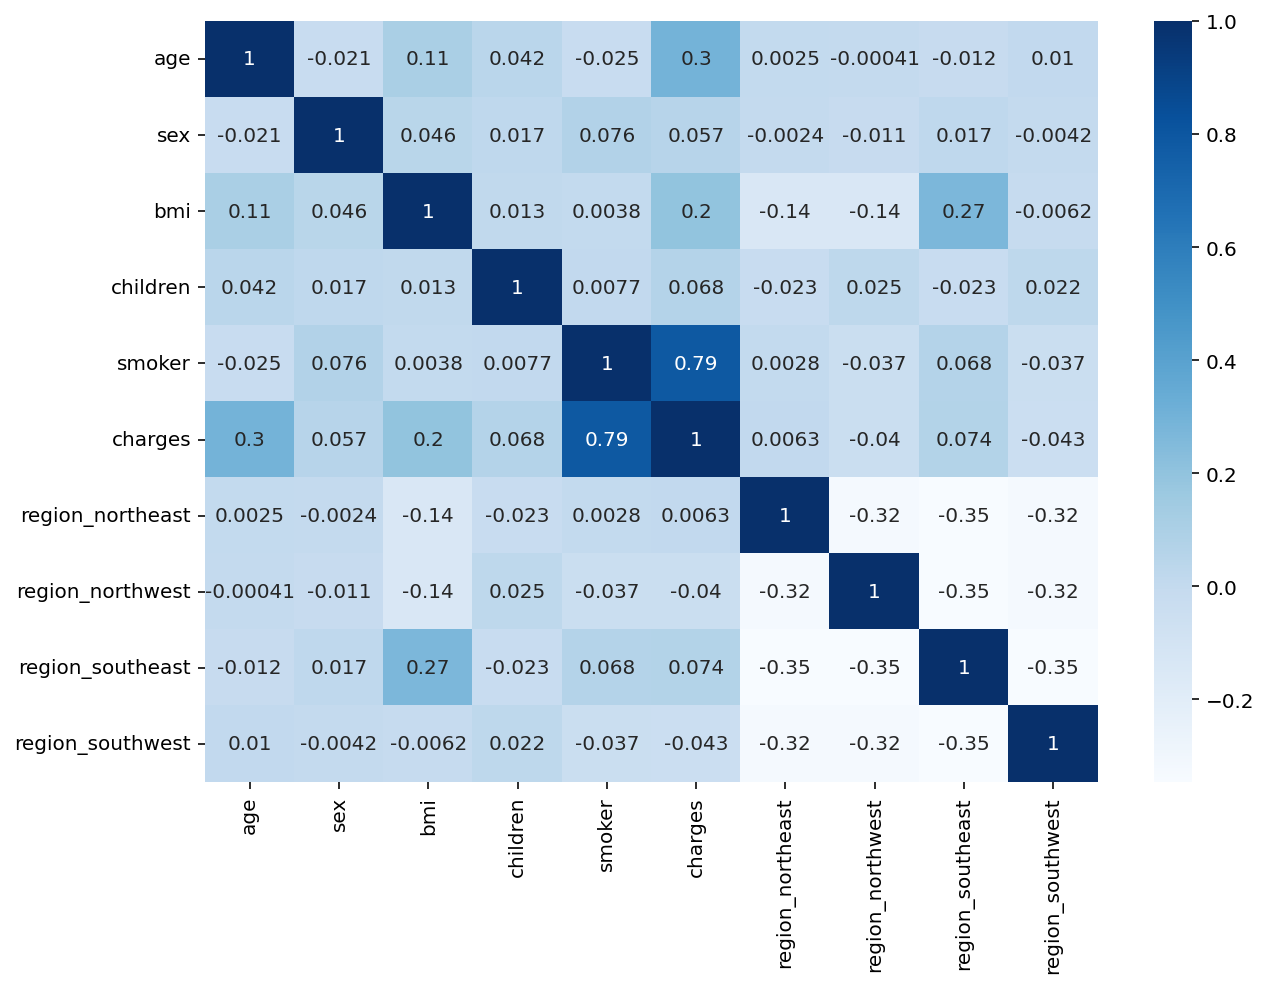

In [146]:
plt.figure(figsize=(10, 7))
sns.heatmap(data.corr(), annot=True, cmap='Blues')
plt.show()

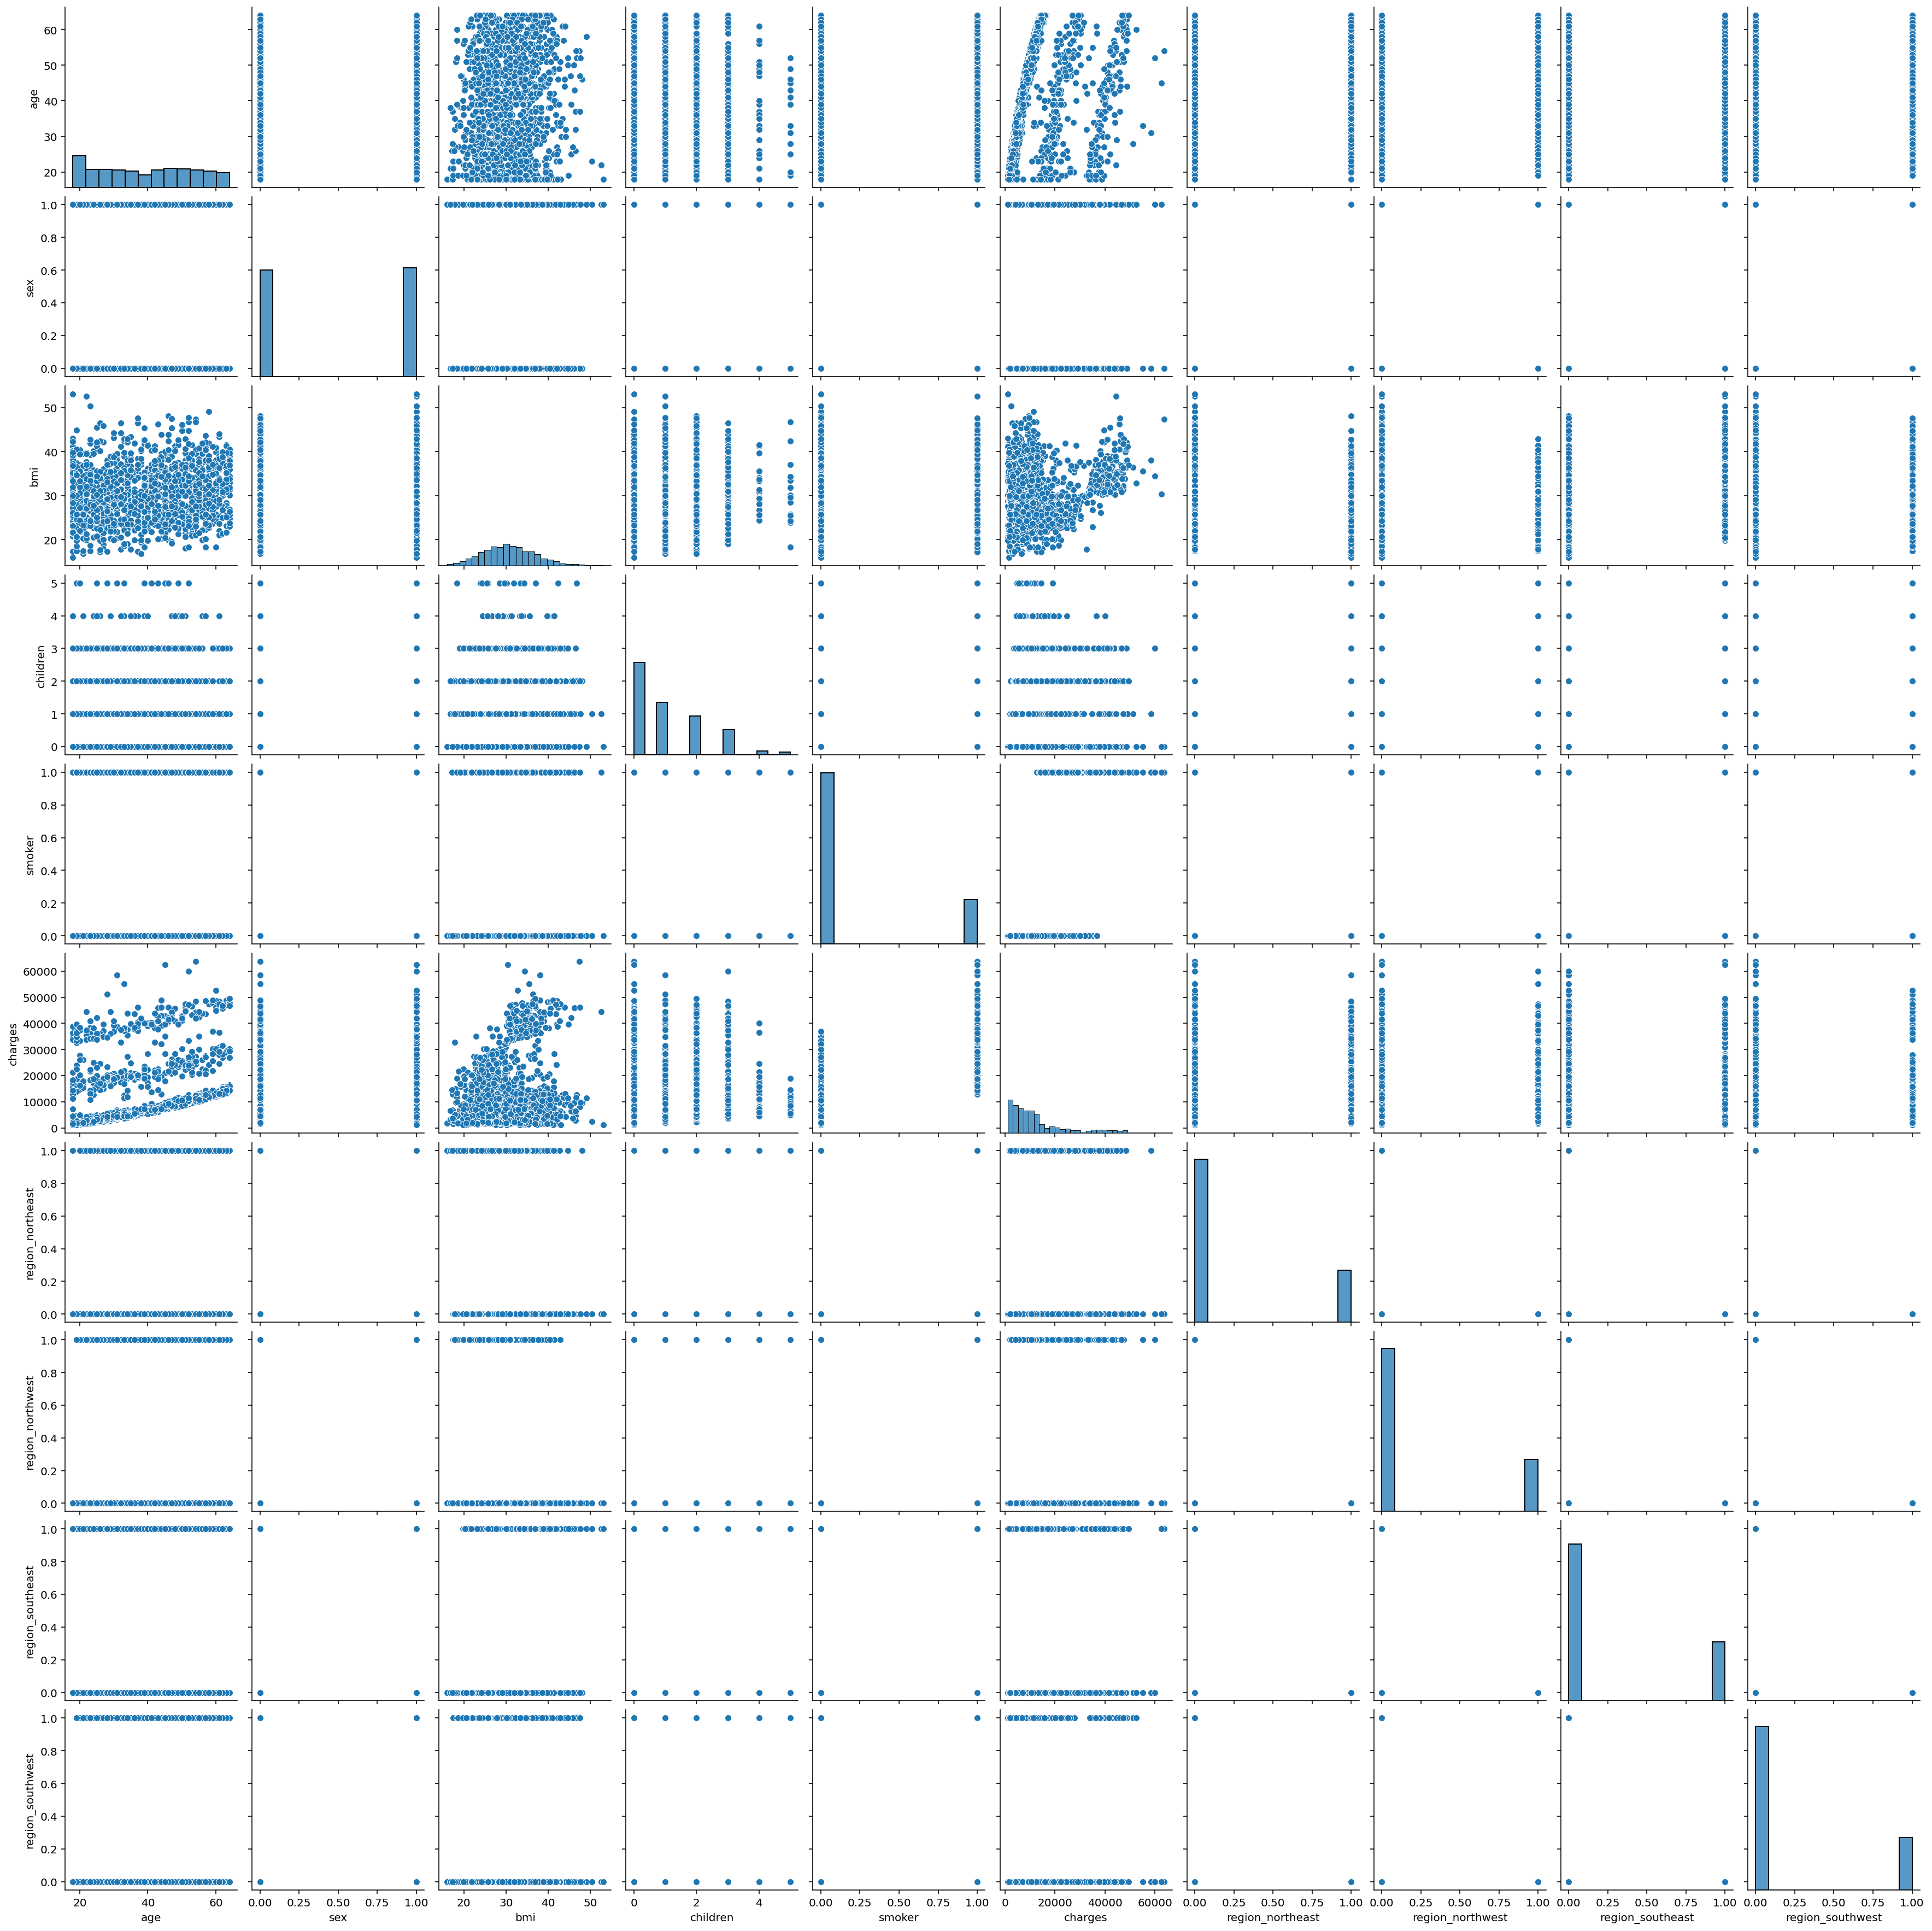

In [147]:
# 상관분석
sns.pairplot(data)
plt.show()

- charges와 smoker의 상관계수가 0.7872로 강한 상관관계를 나타낸다.
- -> 모델링 후 feature 중요도에서 smoker가 많은 비중을 차지할 것이다
- charge와 age의 상관계수가 0.2990로 약한 상관관계를 나타낸다.

**3) x, y 분리**

- charges 변수가 Target입니다.

In [148]:
# target 확인
target = 'charges'

# 데이터 분리
x = data.drop(target, axis=1)
y = data[target]

In [149]:
# 확인
x.head()

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,0,0,0,1
1,18,1,33.770,1,0,0,0,1,0
2,28,1,33.000,3,0,0,0,1,0
3,33,1,22.705,0,0,0,1,0,0
4,32,1,28.880,0,0,0,1,0,0


**4) 학습용, 평가용 데이터 분리**

- 학습용, 평가용 데이터를 7:3으로 분리합니다.
- random_state 옵션 값은 2022를 지정합니다.

In [150]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 7:3으로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2022)

# 4.모델링

- 본격적으로 모델을 선언하고 학습하고 평가하는 과정을 진행합니다.
- 다양한 알고리즘으로 모델을 만들고 각각의 성능을 확인합니다.
- 성능 평가는 mean_absolute_error, r2_score를 사용합니다.
- 각 알고리즘별로 요구되는 내용이 있으면 이를 숙지하면서 모델링을 진행합니다.

## 4.1.Linear Regression

### 4.1.1.모델링

- Linear Regression 알고리즘으로 모델링하고 성능을 확인합니다.

In [165]:
# 1단계: 불러오기
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error, mean_squared_error

In [166]:
# 2단계: 선언하기
model = LinearRegression()

In [167]:
# 3단계: 학습하기
model.fit(x_train, y_train)

LinearRegression()

In [168]:
# 4단계: 예측하기
y_pred = model.predict(x_test)

In [169]:
# 5단계: 평가하기
print('MAE :', mean_absolute_error(y_test, y_pred))
print('MSE :', mean_squared_error(y_test, y_pred))
print('RMSE :', mean_squared_error(y_test, y_pred) ** 0.5)
print('MAPE :', mean_absolute_percentage_error(y_test, y_pred))
print('R2-Score :', r2_score(y_test, y_pred))

MAE : 4023.060412326258
MSE : 34204836.93847414
RMSE : 5848.490141777974
MAPE : 0.40798181287580837
R2-Score : 0.7815638027456551


### 4.1.2.회귀 계수 확인

- 모델의 coef_, intercept_ 속성으로 변수들의 회귀 계수를 확인합니다.

In [170]:
# 회귀 계수 확인
print('가중치 :', model.coef_)
print('절편', model.intercept_)

가중치 : [  243.60038821  -221.31454859   306.46006963   472.73303281
 23707.39225536   521.99200214   400.21628826  -566.94602047
  -355.26226993]
절편 -10856.700053363184


- 모델의 회귀 계수(coef_)를 가로막대 그래프로 시각화해 확인합니다.

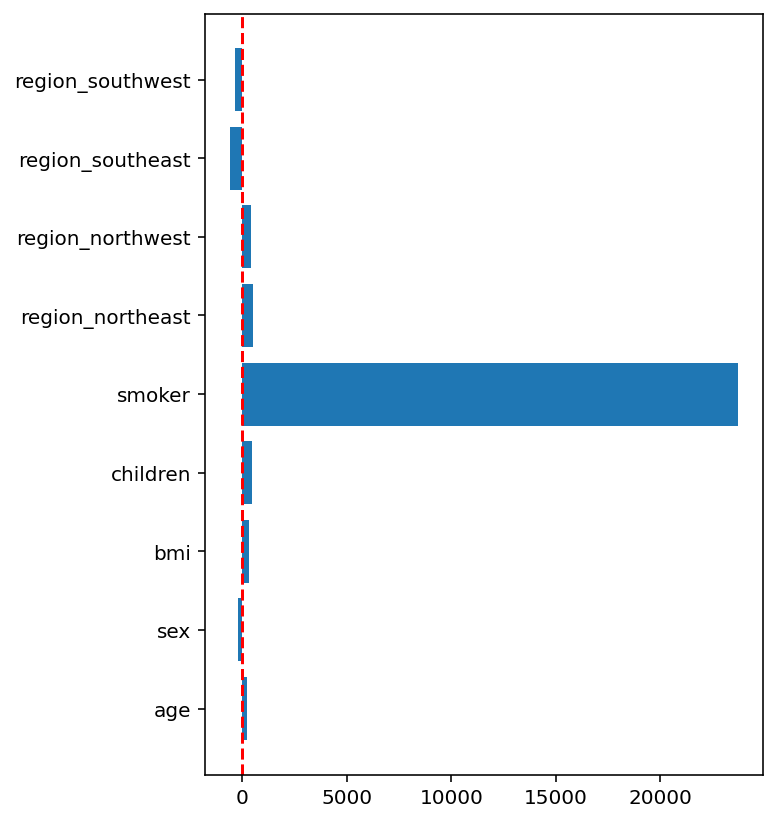

In [171]:
# 변수별 회귀계수 시각화
plt.figure(figsize=(5, 7))
plt.barh(list(x), model.coef_)
plt.axvline(0, color='red', linestyle='--')
plt.show()

- 상관관계 부분에서 smoker가 가장 많은 비중을 차지할 것이라고 생각했는데, 
- Linear Regression 모델링 결과 회귀계수의 시각화에서 압도적으로 smoker가 높은 가중치가 나타난 것을 볼 수 있다.
- --> Linear Regression 모델에서는 smoker로 대부분의 charges를 설명할 수 있다.
- region부분에서는 south부분과 north부분의 가중치의 음양으로 나뉘는 것을 볼 수 있다. 
- --> region을 크게 south와 north로 나눠서 비교해도 의미있는 결과가 나올 것 같다.

### 4.1.3.성능 정보 수집

- 모델 각각의 성능을 모아 마지막에 비교하기 위해 아래 구문을 수행해 성능 정보를 score 변수에 저장합니다.

In [172]:
# 성능 정보 수집
score={}
score['Linear Regression'] = r2_score(y_test, y_pred)

## 4.2.Decision Tree

### 4.2.1.모델링

- Decision Tree 알고리즘으로 모델링하고 성능을 확인합니다.
- 모델 선언시 random_state=2022을 지정합니다.

In [173]:
# 1단계: 불러오기
from sklearn.tree import DecisionTreeRegressor

In [174]:
# 2단계: 선언하기
model = DecisionTreeRegressor(random_state=2022)

In [175]:
# 3단계: 학습하기
model.fit(x_train, y_train)

DecisionTreeRegressor(random_state=2022)

In [176]:
# 4단계: 예측하기
y_pred = model.predict(x_test)

In [177]:
# 5단계: 평가하기
print('MAE :', mean_absolute_error(y_test, y_pred))
print('MSE :', mean_squared_error(y_test, y_pred))
print('RMSE :', mean_squared_error(y_test, y_pred) ** 0.5)
print('MAPE :', mean_absolute_percentage_error(y_test, y_pred))
print('R2-Score :', r2_score(y_test, y_pred))

MAE : 2685.7828874626866
MSE : 36015356.83336337
RMSE : 6001.279599665672
MAPE : 0.35320678588262855
R2-Score : 0.770001605223582


### 4.2.2.변수 중요도 확인

- 모델의 feature_importances_ 속성으로 변수들(Features) 중요도를 확인합니다.

In [178]:
# 중요도 확인
print(list(x))
print(model.feature_importances_)

['age', 'sex', 'bmi', 'children', 'smoker', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']
[0.12101222 0.0060431  0.21792315 0.01983888 0.61850291 0.00369241
 0.00555175 0.00587933 0.00155625]


- 변수 중요도를 가로막대 그래프로 시각화해 확인합니다.

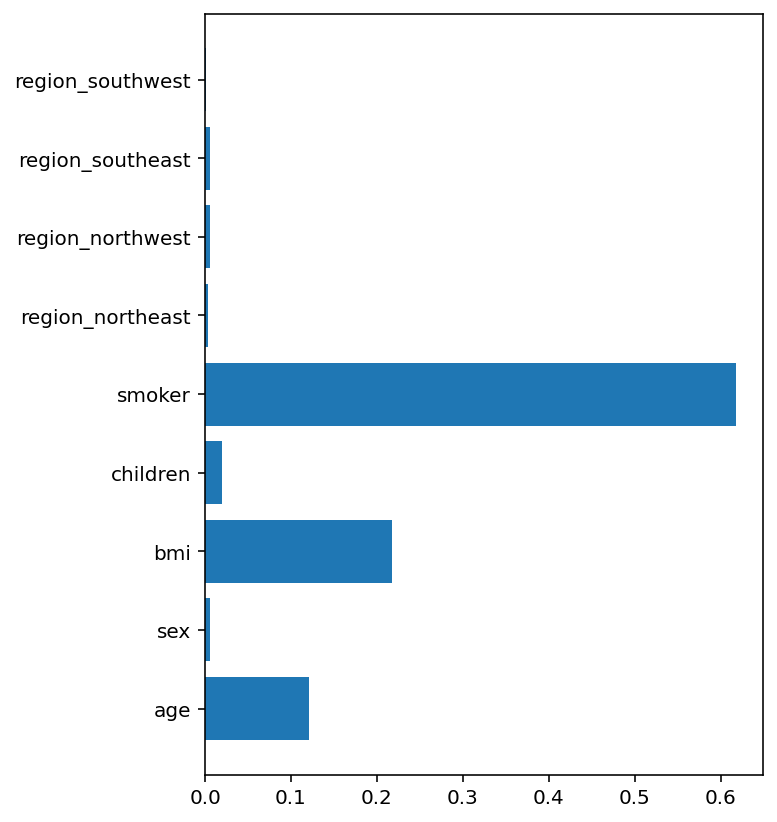

In [179]:
# 중요도 시각화
plt.figure(figsize=(5, 7))
plt.barh(list(x), model.feature_importances_)
plt.show()

- Decision Tree에서도 smoker가 가장 많은 중요도 부분을 차지하고 있다.
- Linear 모델과는 다르게 Decision Tree에서는 bmi가 2번째, age가 3번째로 의미있는 중요도를 갖는다.

### 4.2.3.성능 정보 수집

- 아래 구문을 수행해 성능 정보를 수집합니다.

In [180]:
# 성능 정보 수집
score['Decision Tree'] = r2_score(y_test, y_pred)

## 4.3.Random Forest

### 4.3.1.모델링

- Random Forest 알고리즘으로 모델링하고 성능을 확인합니다.
- 모델 선언시 random_state=2022을 지정합니다.

In [181]:
# 1단계: 불러오기
from sklearn.ensemble import RandomForestRegressor

In [182]:
# 2단계: 선언하기
model = RandomForestRegressor(random_state=2022)

In [183]:
# 3단계: 학습하기
model.fit(x_train, y_train)

RandomForestRegressor(random_state=2022)

In [184]:
# 4단계: 예측하기
y_pred = model.predict(x_test)

In [185]:
# 5단계: 평가하기
print('MAE :', mean_absolute_error(y_test, y_pred))
print('MSE :', mean_squared_error(y_test, y_pred))
print('RMSE :', mean_squared_error(y_test, y_pred) ** 0.5)
print('MAPE :', mean_absolute_percentage_error(y_test, y_pred))
print('R2-Score :', r2_score(y_test, y_pred))

MAE : 2485.1713388938642
MSE : 21463567.744921204
RMSE : 4632.878990964604
MAPE : 0.3342532796946551
R2-Score : 0.8629310782523276


### 4.3.2.변수 중요도 확인

- 모델의 feature_importances_ 속성으로 변수들(Features) 중요도를 확인합니다.

In [186]:
# 중요도 확인
print(list(x))
print(model.feature_importances_)

['age', 'sex', 'bmi', 'children', 'smoker', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']
[0.13079607 0.0066782  0.20369921 0.02275362 0.61625573 0.00519546
 0.0062672  0.00438312 0.00397139]


- 변수 중요도를 가로막대 그래프로 시각화해 확인합니다.

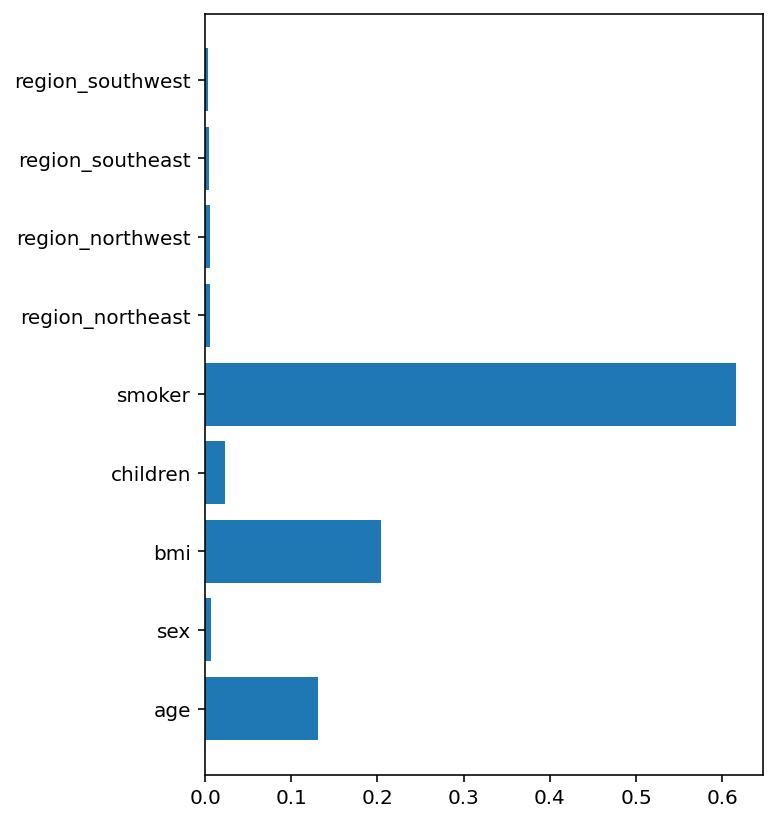

In [187]:
# 중요도 시각화
plt.figure(figsize=(5, 7))
plt.barh(list(x), model.feature_importances_)
plt.show()

- Decision Tree와 비슷한 구도로 특성 중요도가 나타난다.
- smoker와 bmi의 중요도는 살짝 줄어들고, age, children의 중요도가 살짝 늘어난 것을 알 수 있다.

### 4.3.3.성능 정보 수집

- 아래 구문을 수행해 성능 정보를 수집합니다.

In [188]:
# 성능 정보 수집
score['Random Forest'] = r2_score(y_test, y_pred)

## 4.4.XGBoost

### 4.4.1.모델링

- XGBoost 알고리즘으로 모델링하고 성능을 확인합니다.
- 모델 선언시 random_state=2022를 지정합니다.

In [189]:
# 1단계: 불러오기
from xgboost import XGBRegressor

In [190]:
# 2단계: 선언하기
model = XGBRegressor(random_state=2022)

In [191]:
# 3단계: 학습하기
model.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=2022,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [192]:
# 4단계: 예측하기
y_pred = model.predict(x_test)

In [193]:
# 5단계: 평가하기
print('MAE :', mean_absolute_error(y_test, y_pred))
print('MSE :', mean_squared_error(y_test, y_pred))
print('RMSE :', mean_squared_error(y_test, y_pred) ** 0.5)
print('MAPE :', mean_absolute_percentage_error(y_test, y_pred))
print('R2-Score :', r2_score(y_test, y_pred))

MAE : 2850.3466963730903
MSE : 25627853.562953703
RMSE : 5062.396029841374
MAPE : 0.38271567118908034
R2-Score : 0.8363374488189403


### 4.4.2.변수 중요도 확인

- 모델의 feature_importances_ 속성으로 변수들(Features) 중요도를 확인합니다.

In [194]:
# 중요도 확인
print(list(x))
print(model.feature_importances_)

['age', 'sex', 'bmi', 'children', 'smoker', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']
[0.01711867 0.00369968 0.02170262 0.00970053 0.917344   0.00756251
 0.00677899 0.0071344  0.0089587 ]


- 변수 중요도를 가로막대 그래프로 시각화해 확인합니다.

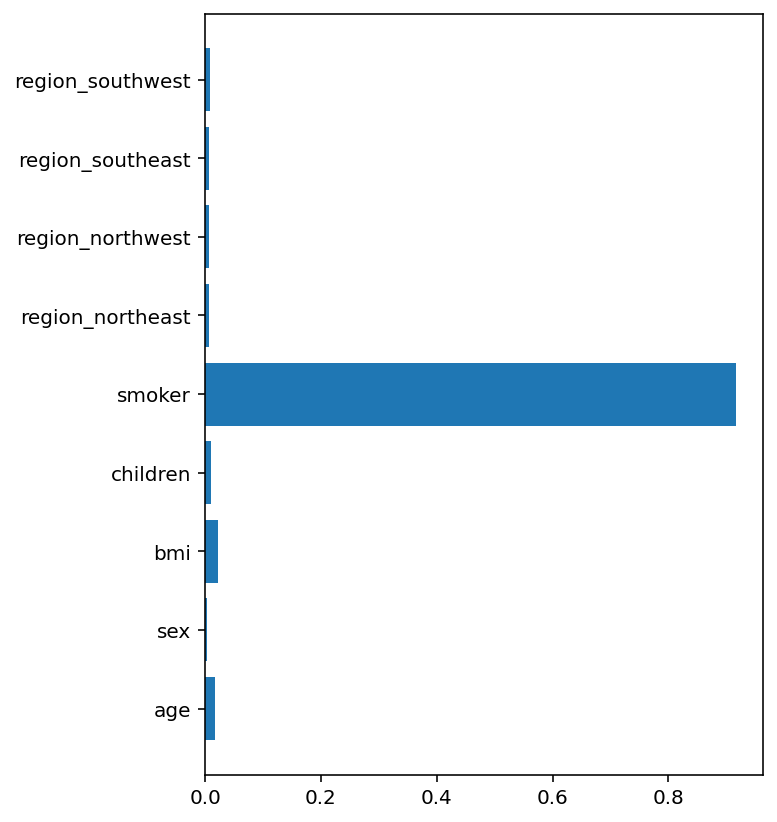

In [195]:
# 중요도 시각화
plt.figure(figsize=(5, 7))
plt.barh(list(x), model.feature_importances_)
plt.show()

- Linear 모델과 비슷한 특성 중요도 구도를 보인다.
- smoker의 중요도가 0.9173로 이 모델에서는 가장 중요하고 필수적인 특성이라 볼 수 있다.
- Decision Tree와 Random Forest에서 의미있는 중요도를 갖는 bmi, age는 XGBoost 모델에서는 중요도가 많이 떨어진 것을 알 수 있다.

### 4.4.3.성능 정보 수집

- 아래 구문을 수행해 성능 정보를 수집합니다.

In [196]:
# 성능 정보 수집
score['XGBoost'] = r2_score(y_test, y_pred)

# 5.정리

- 앞에서 수집한 성능 정보를 시각화해 확인합니다.

-Linear Regression: 0.7816
-Decision Tree: 0.7700
-Random Forest: 0.8629
-XGBoost: 0.8363


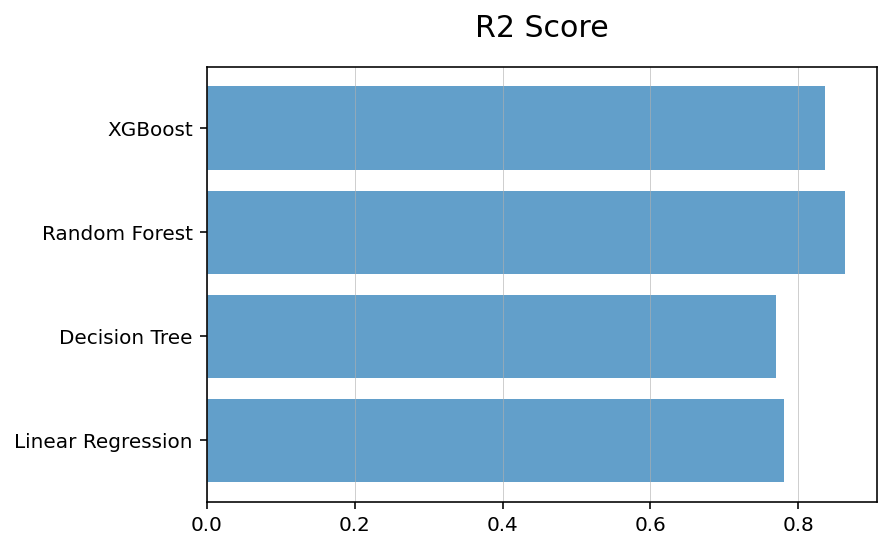

In [76]:
# 성능 정보
for k, v in score.items():
    print(f'-{k}: {v:.4f}')

# 시각화
plt.barh(list(score.keys()), score.values(), alpha=0.7)
plt.title('R2 Score', size=15, pad=15)
plt.grid(axis='x', linewidth=0.3)
plt.show()

- Random Forest의 결정계수가 0.8629로 총 오차에서 설명할 수 있는 오차가 86.29%이다.
- 기본 알고리즘보다 앙상블을 이용한 알고리즘 모델을 했을 때의 성능이 더 좋은 것을 볼 수 있다.

# 6.(옵션) 튜닝

- 마음에 드는 모델을 선택하여 튜닝을 진행합니다.

### 6.1 RandomForest

- RandomSearch

In [152]:
# 불러오기
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [153]:
# 파라미터 범위 지정
param = {'max_depth':range(1, 51),
         'min_samples_leaf':range(1, 11),
         'min_samples_split':range(2, 11),
         'n_estimators':range(10, 211, 10)}

In [154]:
# 튜닝
model_rt = RandomForestRegressor(random_state=2022)
model = RandomizedSearchCV(model_rt,
                           param, 
                           cv = 10,
                           n_iter=30,
                           n_jobs=-1)

In [155]:
# 학습하기
model.fit(x_train, y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(random_state=2022),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'max_depth': range(1, 51),
                                        'min_samples_leaf': range(1, 11),
                                        'min_samples_split': range(2, 11),
                                        'n_estimators': range(10, 211, 10)})

In [156]:
# 확인하기
print('최적의 파라미터 :', model.best_params_)
print('최고 성능 :', model.best_score_) 

최적의 파라미터 : {'n_estimators': 40, 'min_samples_split': 7, 'min_samples_leaf': 6, 'max_depth': 5}
최고 성능 : 0.8476635376063838


- GridSearch

In [158]:
# 파라미터 범위 지정
param = {'max_depth':range(2, 9),
         'min_samples_leaf':range(7, 12),
         'min_samples_split':range(7, 10),
         'n_estimators':range(60, 101, 10)}

In [200]:
# 튜닝
model_rt = RandomForestRegressor(random_state=2022)
model = GridSearchCV(model_rt,
                    param, 
                    cv = 10,
                    n_jobs=-1)

In [201]:
# 학습하기
model.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=2022),
             n_jobs=-1,
             param_grid={'max_depth': range(2, 9),
                         'min_samples_leaf': range(7, 12),
                         'min_samples_split': range(7, 10),
                         'n_estimators': range(60, 101, 10)})

In [202]:
# 확인하기
print('최적의 파라미터 :', model.best_params_)
print('최고 성능 :', model.best_score_) 

최적의 파라미터 : {'max_depth': 4, 'min_samples_leaf': 7, 'min_samples_split': 7, 'n_estimators': 60}
최고 성능 : 0.8493354720444695


- 예측 &  평가 

In [162]:
# 예측하기
y_pred = model.predict(x_test)

# 평가하기
print('MAE :', mean_absolute_error(y_test, y_pred))
print('R2-Score :', r2_score(y_test, y_pred))

MAE : 2407.308022549266
R2-Score : 0.8831399947416986


In [163]:
score={}
score['Random & Grid'] = r2_score(y_test, y_pred)

-Linear Regression: 0.7816
-Decision Tree: 0.7700
-Random Forest: 0.8629
-XGBoost: 0.8363


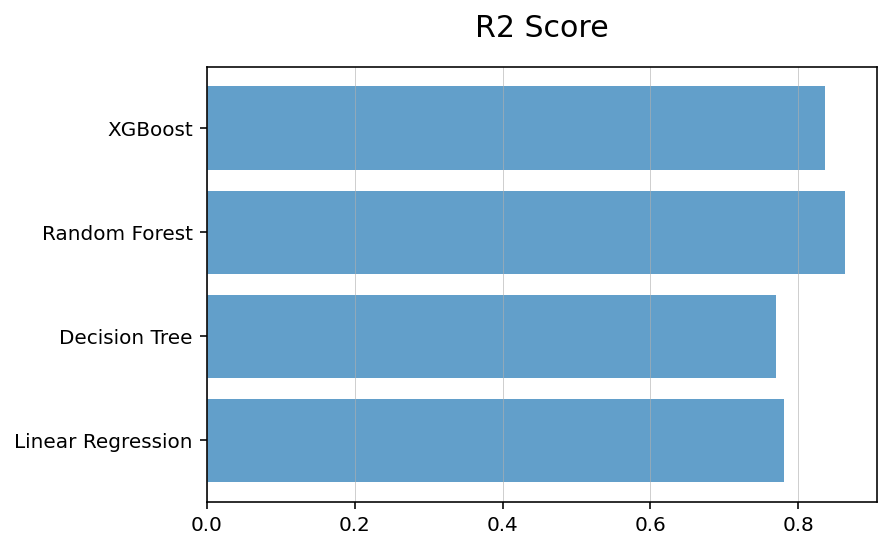

In [197]:
# 성능 정보
for k, v in score.items():
    print(f'-{k}: {v:.4f}')

# 시각화
plt.barh(list(score.keys()), score.values(), alpha=0.7)
plt.title('R2 Score', size=15, pad=15)
plt.grid(axis='x', linewidth=0.3)
plt.show()

- Randomsearch로 max_depth(나무 깊이), min_samples_leaf(최소 잎의 개수), min_samples_split(최소 샘플 split개수), n_estimators(tree의 개수)의 범위를 지정하고 조합 중 랜덤하게 30개를 고른 모델의 최고 성능이 0.849320였다.
- Randomsearch에서 최고 성능을 낸 각 파라미터를 중심으로 범위를 지정하고 GridSearch로 모든 조합을 돌린 모델의 최고 성능이 0.849335로 약간의 향상된 성능을 확인할 수 있다.
- Random Forest 기본 파라미터로 예측 했을 때 결정계수가 0.8629이었는데 Randomsearch와 Gridsearch 튜닝 결과 결정계수가 0.8831으로 향상된 성능을 얻을 수 있었다.

### 6.3 XGBoost

- RandomSearch

In [114]:
# 파라미터 범위 지정
param = {'max_depth':range(1, 51),
         'n_estimators':range(10, 211, 10)}

In [115]:
# 튜닝
model_rt = XGBRegressor(random_state=2022)
model = RandomizedSearchCV(model_rt,
                           param, 
                           cv = 5,
                           n_iter=30,
                           n_jobs=-1)

In [116]:
# 학습하기
model.fit(x_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          enable_categorical=False, gamma=None,
                                          gpu_id=None, importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predicto

In [118]:
# 확인하기
print('최적의 파라미터 :', model.best_params_)
print('최고 성능 :', model.best_score_) 

최적의 파라미터 : {'n_estimators': 60, 'max_depth': 2}
최고 성능 : 0.8441614530464452


- GridSearch

In [120]:
# 파라미터 범위 지정
param = {'max_depth':range(1, 7),
         'n_estimators':range(40, 90, 10)}

In [121]:
# 튜닝
model_rt = RandomForestRegressor(random_state=2022)
model = GridSearchCV(model_rt,
                    param, 
                    cv = 10,
                    n_jobs=-1)

In [122]:
# 학습하기
model.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=2022),
             n_jobs=-1,
             param_grid={'max_depth': range(1, 7),
                         'n_estimators': range(40, 90, 10)})

In [123]:
# 확인하기
print('최적의 파라미터 :', model.best_params_)
print('최고 성능 :', model.best_score_) 

최적의 파라미터 : {'max_depth': 4, 'n_estimators': 80}
최고 성능 : 0.8470909380784821


- 예측 &  평가 

In [124]:
# 예측하기
y_pred = model.predict(x_test)

# 평가하기
print('MAE :', mean_absolute_error(y_test, y_pred))
print('R2-Score :', r2_score(y_test, y_pred))

MAE : 2409.877537049087
R2-Score : 0.8813348241851277


- Randomsearch로 max_depth(나무 깊이), n_estimators(생성할 weak learner의 수)의 범위를 지정하고 조합 중 랜덤하게 30개를 고른 모델의 최고 성능이 0.8442였다.
- Randomsearch에서 최고 성능을 낸 각 파라미터를 중심으로 범위를 지정하고 GridSearch로 모든 조합을 돌린 모델의 최고 성능이 0.8471로 향상된 성능을 확인할 수 있다.
- Random Forest 기본 파라미터로 예측 했을 때 결정계수가 0.8363이었는데 Randomsearch와 Gridsearch 튜닝 결과 결정계수가 0.8813으로 향상된 성능을 얻을 수 있었다.

## 결론

회사가..
- 보험회사인 경우) 타겟 고객층을 흡연 고객으로 하여 보험을 들게 한다.
건강보험공단인 경우) 담배값뿐 아니라 보험비도 더 많이 내게된다는 경각심을 일깨워주는 공익광고를 낸다.